Stock Prediction Using LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (20.0, 10.0)

c:\Users\SHRADDHA SINGH\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\SHRADDHA SINGH\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\SHRADDHA SINGH\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("C:\\Users\SHRADDHA SINGH\OneDrive\Desktop\MCA/bharat intern\Stock Prediction/apple-stock-prediction.csv")
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,2/27/2020,$273.52,80151380,$281.10,$286,$272.96
2,2/26/2020,$292.65,49678430,$286.53,$297.88,$286.50
3,2/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,2/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [3]:
df.shape

(2518, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [5]:
df1 = df.iloc[:,1]
df1.head()

0     $273.36   
1     $273.52   
2     $292.65   
3     $288.08   
4     $298.18   
Name:  Close/Last, dtype: object

In [6]:
df1 = df1.replace('[\$,]', '', regex=True).astype(float)
df1.head()

0    273.36
1    273.52
2    292.65
3    288.08
4    298.18
Name:  Close/Last, dtype: float64

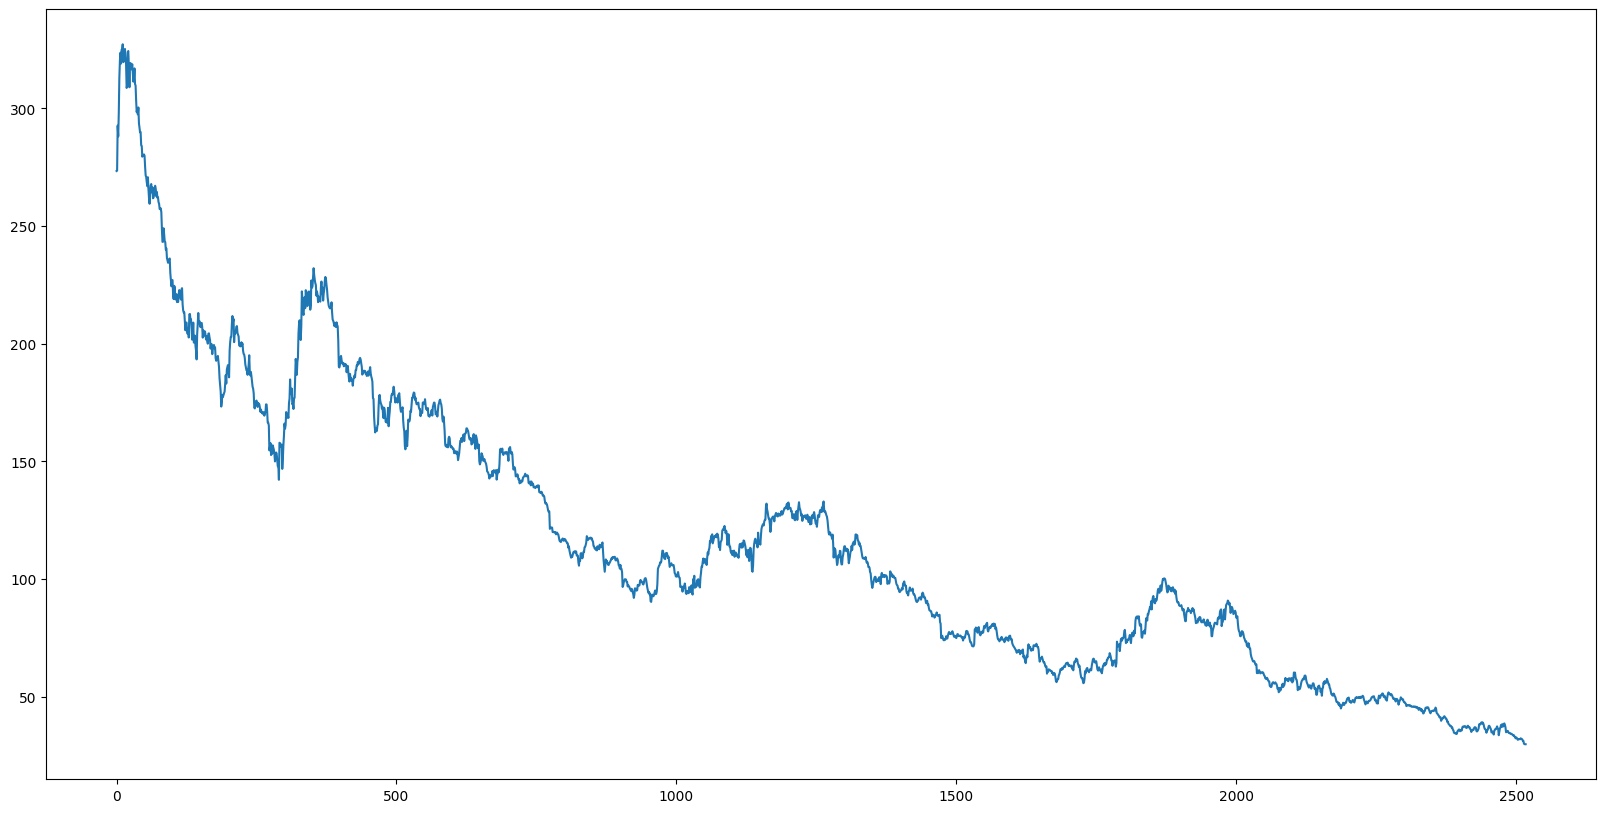

In [7]:
plt.plot(df1)

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result  = seasonal_decompose(pd.Series(df1),period=100)

result.plot()
plt.title('Apple Stock')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
df1.shape

(2518,)

In [ ]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)
print('\n df1 present shape : ', df1.shape)

[[8.18940005e-01]
 [8.19478074e-01]
 [8.83810869e-01]
 ...
 [2.01775626e-04]
 [0.00000000e+00]
 [6.72585418e-05]]

 df1 present shape :  (2518, 1)


Train Test Split

In [ ]:
training_size = int(len(df1)*0.7)
test_size = len(df1) - training_size
print('Training Size : ',training_size)
print('Test Size : ',test_size)

Training Size :  1762
Test Size :  756


In [ ]:
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:]
print('Training Data Shape : ', train_data.shape)
print('Test Data Shape: ', test_data.shape)

Training Data Shape :  (1762, 1)
Test Data Shape:  (756, 1)


In [ ]:
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
window = 100
X_train, y_train = create_dataset(train_data, window=100)
X_test, y_test = create_dataset(test_data, window=100)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1661, 100) (1661,)
(655, 100) (655,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Fitting the data to the model

In [ ]:
model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 100, batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 18s 282ms/step - loss: 0.0211 - val_loss: 0.0068
Epoch 2/100
26/26 [==============================] - 9s 337ms/step - loss: 0.0012 - val_loss: 1.4217e-04
Epoch 3/100
26/26 [==============================] - 9s 360ms/step - loss: 5.1436e-04 - val_loss: 1.6190e-04
Epoch 4/100
26/26 [==============================] - 9s 362ms/step - loss: 4.7324e-04 - val_loss: 1.2577e-04
Epoch 5/100
 1/26 [>.............................] - ETA: 4s - loss: 5.7332e-04

In [ ]:
y_pred = scaler.inverse_transform(model.predict(X_test))

21/21 [==============================] - 2s 34ms/step


In [ ]:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
y_pred[:5]

array([[91.85449 ],
       [92.30552 ],
       [92.75344 ],
       [93.19719 ],
       [93.661865]], dtype=float32)

In [ ]:
y_test[:5]

array([[94.47],
       [94.2 ],
       [95.3 ],
       [97.33],
       [95.03]])

Evaluation

In [ ]:
import math
from sklearn.metrics import mean_squared_error

rmse_score = math.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error(test) : ',rmse_score)

Root Mean Squared Error(test) :  2.736173848535744


In [ ]:
from sklearn.metrics import r2_score
print('R-squared Score  : ',r2_score(y_test,y_pred))

R-squared Score  :  0.9785003465352956


Visualization

52/52 [==============================] - 3s 55ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


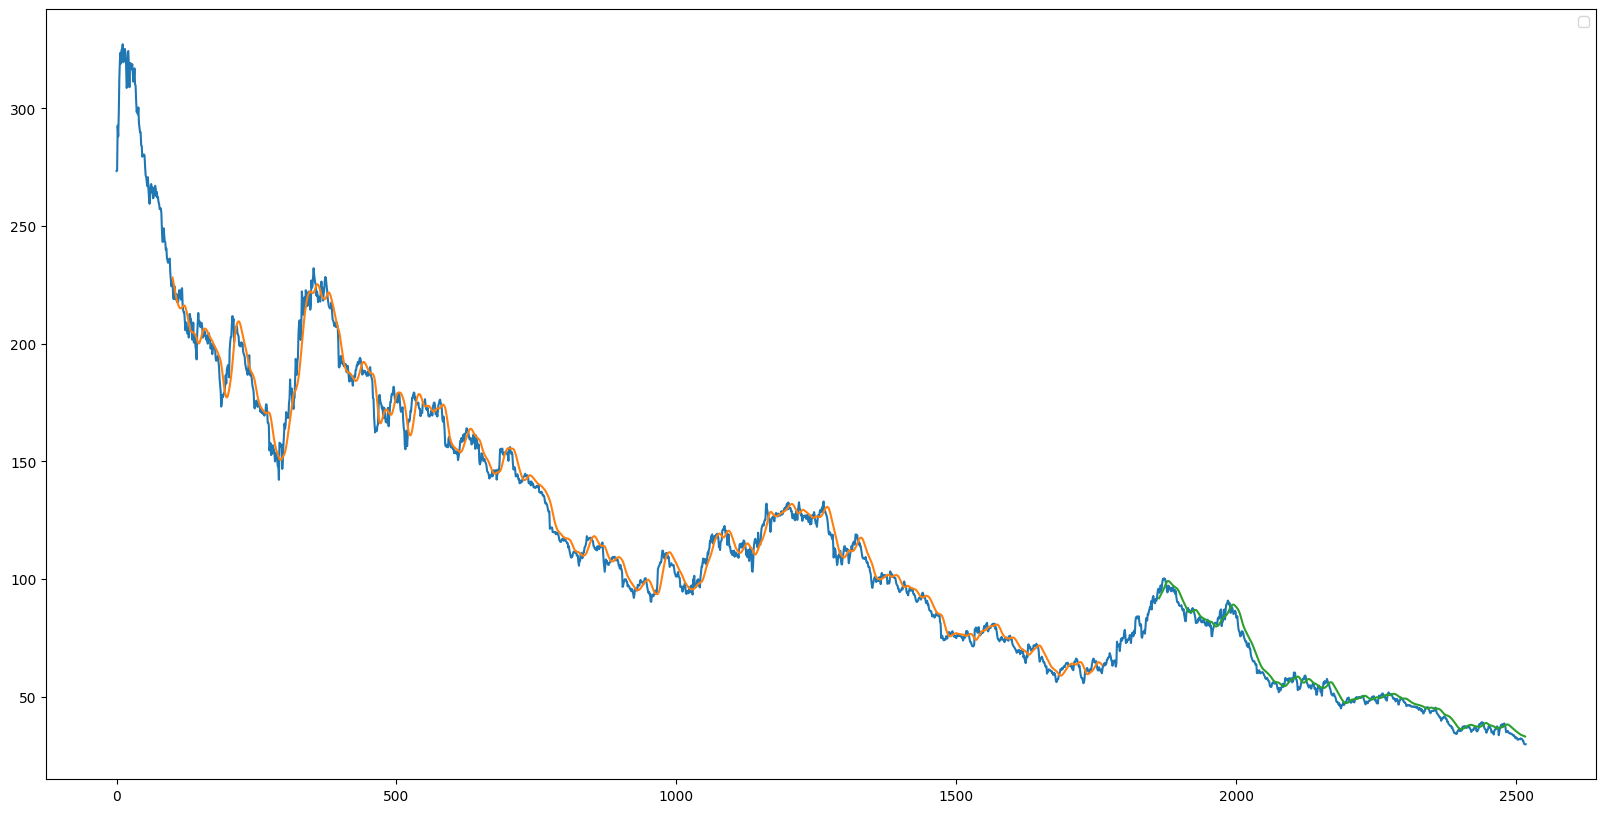

In [ ]:
train_predict = scaler.inverse_transform(model.predict(X_train))

look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = y_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()

Predict 30 Days future value

In [ ]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
print(scaler.inverse_transform(lst_output))

[[32.81054254]
 [32.66264763]
 [32.56125035]
 [32.51219271]
 [32.51207363]
 [32.55304883]
 [32.62593561]
 [32.72200045]
 [32.83384632]
 [32.95568772]
 [33.08329913]
 [33.21377989]
 [33.34526621]
 [33.47665395]
 [33.60736346]
 [33.73714385]
 [33.86594138]
 [33.99380341]
 [34.12082079]
 [34.24709015]
 [34.37269929]
 [34.49771745]
 [34.62219447]
 [34.74616414]
 [34.86964973]
 [34.99266507]
 [35.11521294]
 [35.23729943]
 [35.3589262 ]
 [35.48009215]]


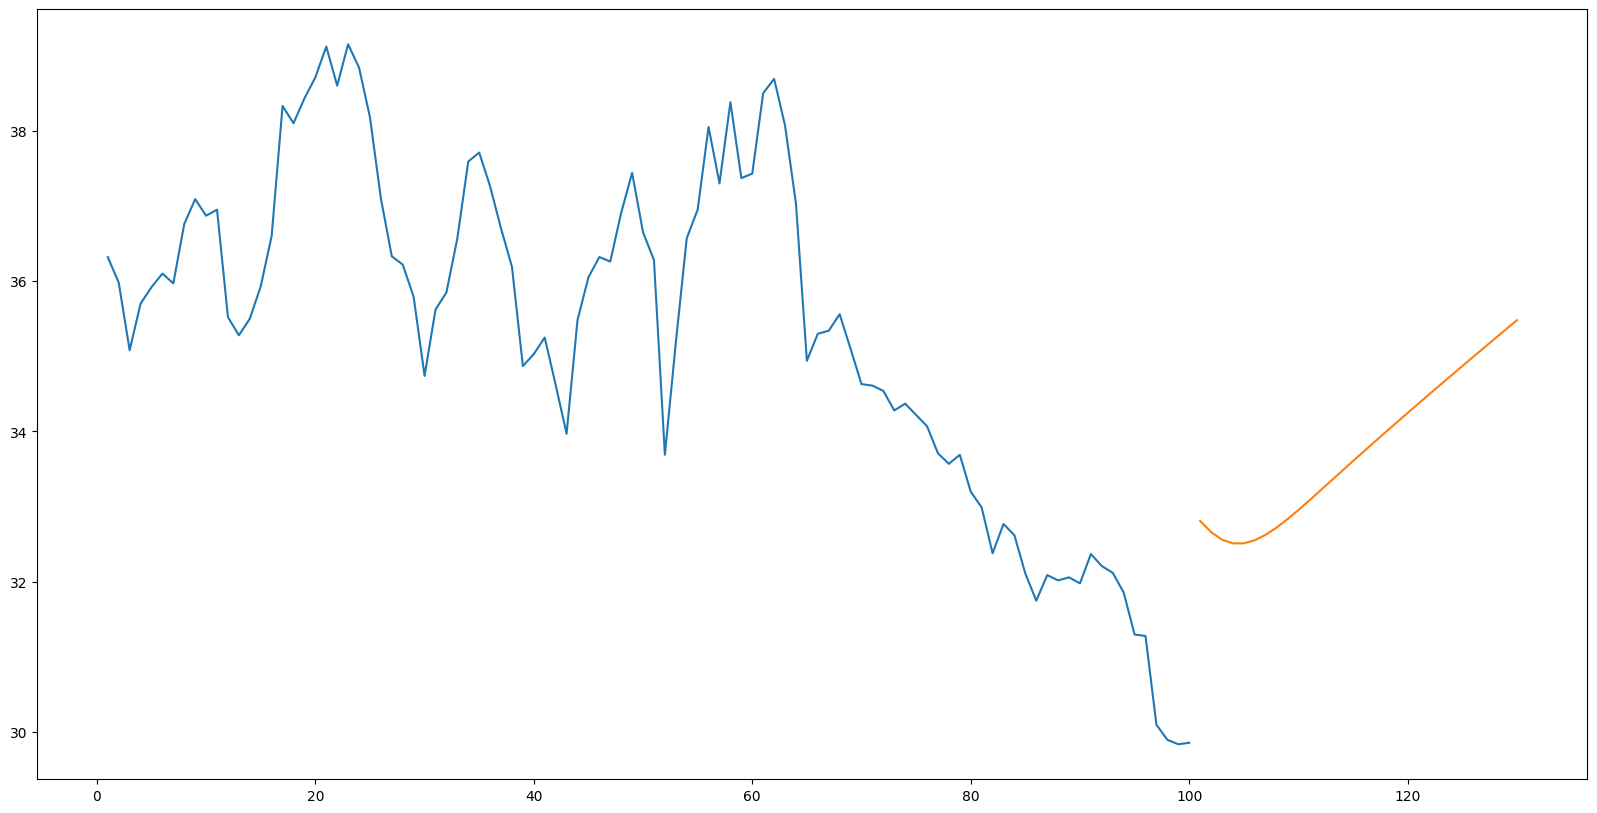

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))